# Exploratory Data Analysis(EDA) on Titanic Dataset from Kaggle

What is EDA ?

EDA has three steps: 


1)Analysis: Find the every relationship hidden in the data. To get out the hidden information and analyze it. 

2)Feature Engineering: Create new columns, Modifying existing ones, manipulate columns.

3)Handling Outrliers: Detect outliers and remove it.

In [1]:
#importing required libraries
import numpy as np   #linear algebra
import pandas as pd   #data processing
import matplotlib.pyplot as plt   #visualizing
import seaborn as sns ##visualizing

In [2]:
#importing train dataset
df = pd.read_csv('train.csv')

In [3]:
#Finding shape 
df.shape

(891, 12)

In [4]:
#Previewing data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Columns of data
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

### Categorical Columns: 

-Survived

-Pclass

-Sex

-SibSp

-Parch

-Embarked


### Numerical Coumns:

-Age

-PassengerId

-Fare

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#Finding missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age column has some missing values, Cabin has lot of missing values and Embarked two missing values

In [8]:
#Droping cabin column because many values are missing
df.drop(columns=['Cabin'], inplace = True)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
#Computing missing values for Age
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [11]:
#Computing missing values for Embarked
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
df['Embarked'].fillna('S', inplace= True)

In [13]:
#check dataframe information again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


No missing values present now and memory usage decreased

In [14]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [15]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

### Changing data type for the following columns:

-Survived(Category)
-Pclass(Category)
-Sex(Category)
-Embarked(Category)

In [16]:
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(2), int64(3), object(2)
memory usage: 52.7+ KB


In [18]:
#summary
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


Percentage of people died in the accident 62 %


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


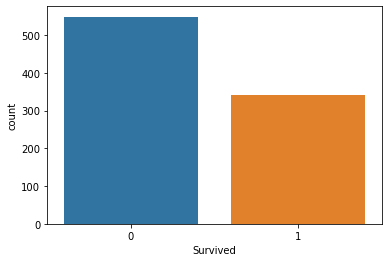

In [19]:
#Univariate analysis
sns.countplot(df['Survived'])
death_percent = round((df['Survived'].value_counts().values[0]/891)*100)
print('Percentage of people died in the accident', death_percent, '%')

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


<AxesSubplot:xlabel='Pclass', ylabel='count'>

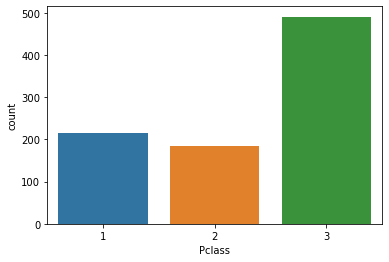

In [20]:
#Pclass
print((df['Pclass'].value_counts()/891)*100)
sns.countplot(df['Pclass'])

Plass - 3 has more people travelling

male      64.758698
female    35.241302
Name: Sex, dtype: float64


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

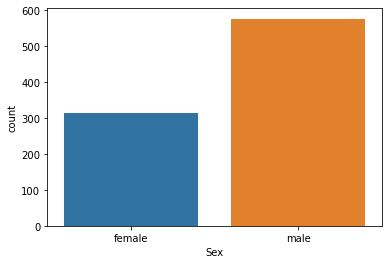

In [21]:
#Sex
print((df['Sex'].value_counts()/891)*100)
sns.countplot(df['Sex'])

0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: SibSp, dtype: float64


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp', ylabel='count'>

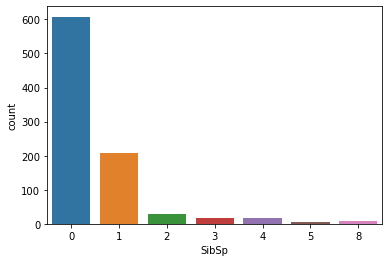

In [22]:
#SibSp
print((df['SibSp'].value_counts()/891)*100)
sns.countplot(df['SibSp'])

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch', ylabel='count'>

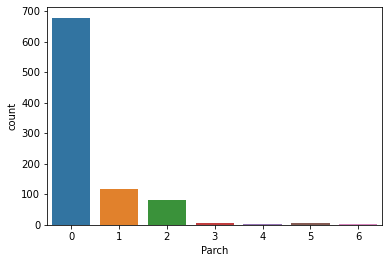

In [23]:
#Parch
print((df['Parch'].value_counts()/891)*100)
sns.countplot(df['Parch'])

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

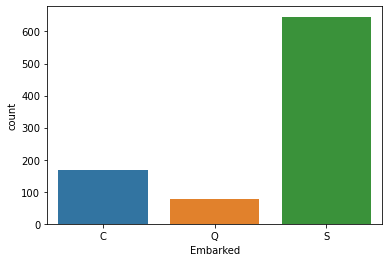

In [24]:
#Embarked
print((df['Embarked'].value_counts()/891)*100)
sns.countplot(df['Embarked'])

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.4344880940129925
0.9662793026645233


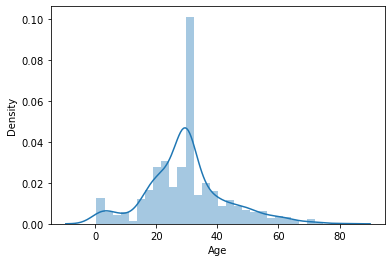

In [25]:
#Age
sns.distplot(df['Age'])
print(df['Age'].skew())
print(df['Age'].kurt())

Conclusion: Normal Distribution


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

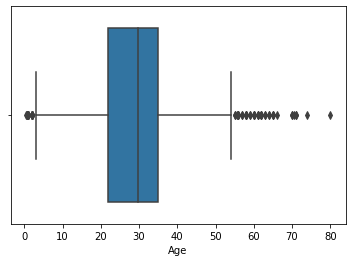

In [26]:
sns.boxplot(df['Age'])

In [27]:
print('People with age in between 60 and 70: ', df[(df['Age']>60) & (df['Age']<70)].shape[0])
print('People with age in between 70 and 75: ', df[(df['Age']>=70) & (df['Age']<=75)].shape[0])
print('People with age in greater than 75: ', df[(df['Age']>75)].shape[0])                                              
print('People with age in between 0 and 1: ', df[(df['Age']<1)].shape[0])                                               

People with age in between 60 and 70:  15
People with age in between 70 and 75:  6
People with age in greater than 75:  1
People with age in between 0 and 1:  7


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

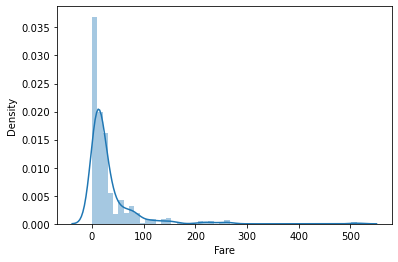

In [28]:
#Fare
sns.distplot(df['Fare'])

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

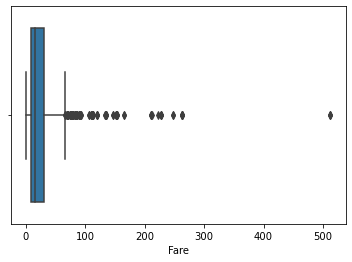

In [29]:
sns.boxplot(df['Fare'])

In [30]:
print('People with fare in between 200 and 300: ', df[(df['Fare']>200) & (df['Fare']<300)].shape[0])
print('People with fare greater than 300: ', df[(df['Fare']>300)].shape[0])

People with fare in between 200 and 300:  17
People with fare greater than 300:  3


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

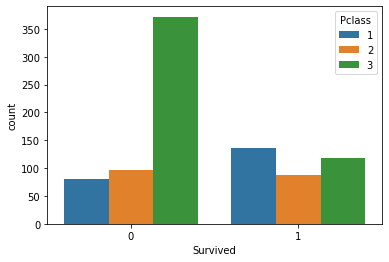

In [31]:
#Multivariate Analysis
#Survived with Pclass
sns.countplot(df['Survived'], hue = df['Pclass'])


In [32]:
pd.crosstab(df['Pclass'],df['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1)

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

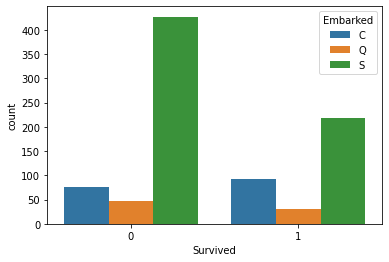

In [33]:
#Survived with Embarked
sns.countplot(df['Survived'], hue = df['Embarked'])

In [34]:
pd.crosstab(df['Embarked'],df['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1)

Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

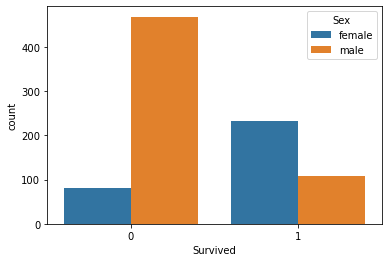

In [35]:

#Survived with Sex
sns.countplot(df['Survived'], hue = df['Sex'])


In [36]:
pd.crosstab(df['Sex'],df['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1)

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

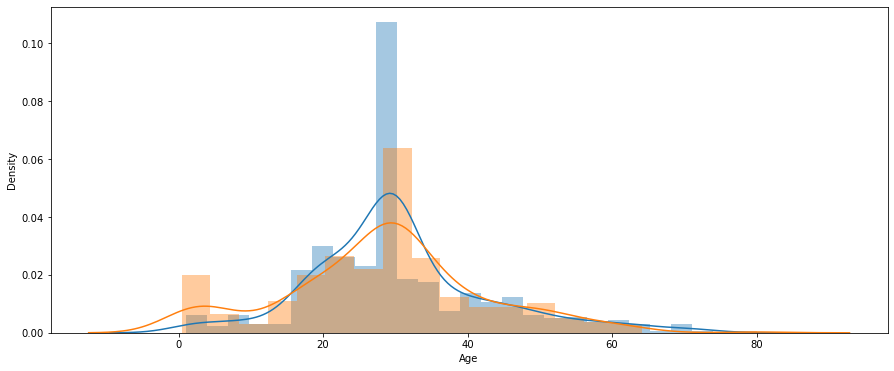

In [37]:
#Survived with Age
plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

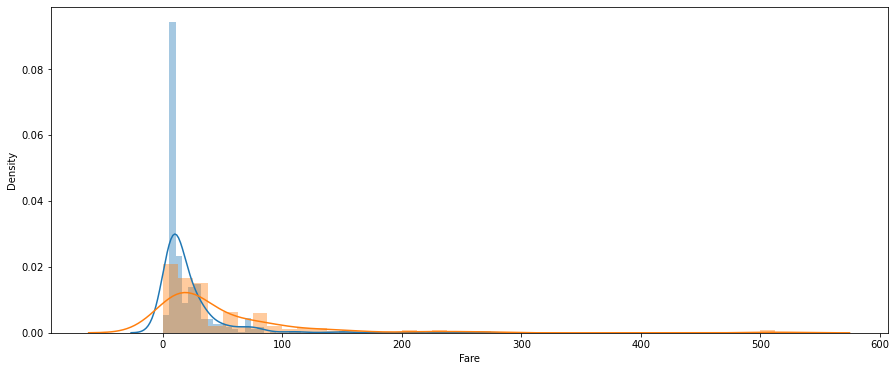

In [38]:
#Survived with Fare
plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Fare'])
sns.distplot(df[df['Survived']==1]['Fare'])

In [39]:
df.corr()

,PassengerId,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.033207,-0.057527,-0.001652,0.012658
Age,0.033207,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.091566,0.159651,0.216225,1.000000


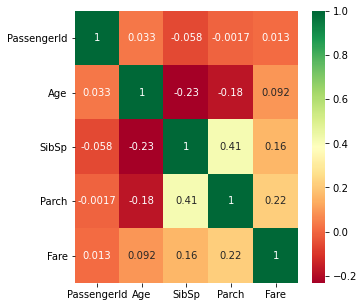

In [40]:
corrmat = df.corr()
correlation = corrmat.index
plt.figure(figsize = (5,5))
#plot heat map
heat_meap = sns.heatmap(df[correlation].corr(), annot = True , cmap = "RdYlGn")

In [41]:
#Feature Engineering
#Merging SibSp and Parch Column in Family Column
df['Family'] = df['SibSp']+df['Parch']

In [42]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,S,0
769,770,0,3,"Gronnestad, Mr. Daniel Danielsen",male,32.0,0,0,8471,8.3625,S,0
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,S,0
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S,5
340,341,1,2,"Navratil, Master. Edmond Roger",male,2.0,1,1,230080,26.0000,S,2


In [43]:
#defining function to add new column family_type
def family_type(f):
    if f==0:
        return 'single'
    elif f>0 and f<=3:
        return 'medium'
    else:
        return 'large'

In [44]:
df['Family_type'] = df['Family'].apply(family_type)

In [45]:
df.drop(['SibSp', 'Parch', 'Family'], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,S,medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C,medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,S,single
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,S,medium
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,S,single
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,211536,13.0000,S,single
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,112053,30.0000,S,single
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,W./C. 6607,23.4500,S,medium
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,111369,30.0000,C,single


In [46]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,Family_type
163,164,0,3,"Calic, Mr. Jovo",male,17.000000,0,0,315093,8.6625,S,0,single
291,292,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.000000,1,0,11967,91.0792,C,1,medium
658,659,0,2,"Eitemiller, Mr. George Floyd",male,23.000000,0,0,29751,13.0000,S,0,single
314,315,0,2,"Hart, Mr. Benjamin",male,43.000000,1,1,F.C.C. 13529,26.2500,S,2,medium
420,421,0,3,"Gheorgheff, Mr. Stanio",male,29.699118,0,0,349254,7.8958,C,0,single


In [47]:
pd.crosstab(df['Family_type'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis= 1 )

Survived,0,1
Family_type,,
large,83.9,16.1
medium,42.1,57.9
single,69.6,30.4


#### Handling Outlier

- if data is following normal normal distribution, anything beyond 3SD - mean + 3SD can be considered as outlier

- if the data does not follow normal distribution, using boxplot we can eliminate points beyond quartile_1 - 1.5IQR and quartile_3 + 1.5IQR

In [48]:
#Handling Outliers from Age column

df =df[df['Age']<df['Age'].mean()+3 *df['Age'].std()]

In [49]:
df.shape

(884, 13)

In [50]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,Family_type
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,S,0,single
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,S,0,single
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,S,3,medium
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C,0,single
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,Q,0,single


In [51]:
#Handling outlier from Fare column
quart_1 = np.percentile(df['Fare'],25)
quart_3 = np.percentile(df['Fare'],75)
outlier_1 = quart_1 - 1.5 * (quart_3-quart_1)
outlier_2 = quart_3 + 1.5 * (quart_3-quart_1)
df = df[(df['Fare']>outlier_1) & (df['Fare']<outlier_2)]

In [52]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,Family_type
752,753,0,3,"Vande Velde, Mr. Johannes Joseph",male,33.000000,0,0,345780,9.5000,S,0,single
410,411,0,3,"Sdycoff, Mr. Todor",male,29.699118,0,0,349222,7.8958,S,0,single
131,132,0,3,"Coelho, Mr. Domingos Fernandeo",male,20.000000,0,0,SOTON/O.Q. 3101307,7.0500,S,0,single
464,465,0,3,"Maisner, Mr. Simon",male,29.699118,0,0,A/S 2816,8.0500,S,0,single
569,570,1,3,"Jonsson, Mr. Carl",male,32.000000,0,0,350417,7.8542,S,0,single


In [53]:
#One-Hot-Encoding
pd.get_dummies(data = df, columns=['Pclass', 'Sex', 'Embarked','Family_type'], drop_first = True)

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Family,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_type_medium,Family_type_single
0,1,0,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,1,0,1,1,0,1,1,0
2,3,1,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,0,0,1,0,0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,1,0,0,0,0,1,1,0
4,5,0,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,0,0,1,1,0,1,0,1
5,6,0,"Moran, Mr. James",29.699118,0,0,330877,8.4583,0,0,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,0,1,0,1,0,1,0,1
887,888,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,0,0,0,0,0,1,0,1
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,3,0,1,0,0,1,1,0
889,890,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,0,0,0,1,0,0,0,1


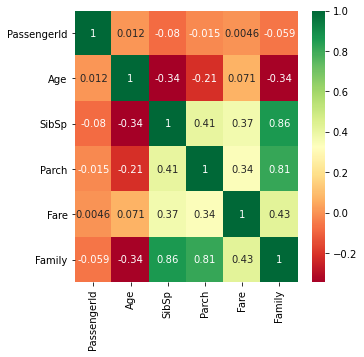

In [54]:
plt.figure(figsize = (5,5))
#plot heat map
heat_meap = sns.heatmap(df.corr(), annot = True , cmap = "RdYlGn")

### Drawing Conclusion

- Male survival is less than female survival.
- Travelling in Pclass 3 was risky.
- People going to C survived more.
- People in the age between 20 to 40 had a chance of not surviving.
- People travelling with Large family size had a less chance of surviving than family who travelling with medium size size or alone.
